### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$


#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 


#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.


Planta Gp(s):
<TransferFunction>: sys[574]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

Lazo cerrado G_LC(s):
<TransferFunction>: sys[576]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10

Polos de G_LC(s):
[-3.+1.j -3.-1.j]


c:\Users\fabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


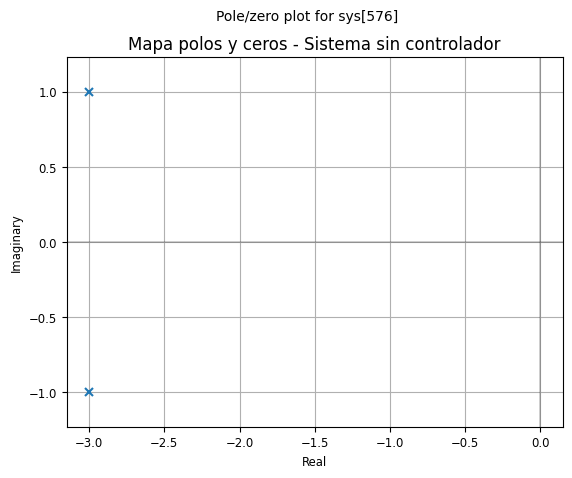

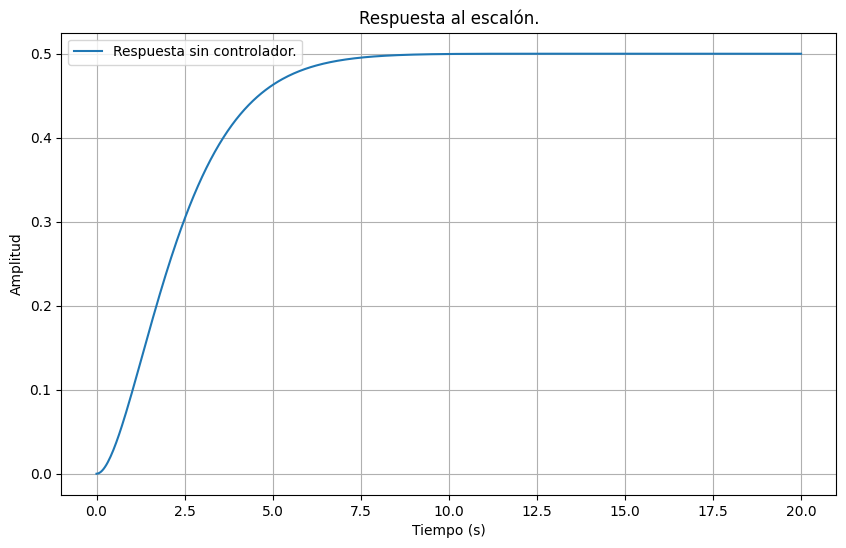

nMétricas de la respuesta al escalón (sistema sin controlador):
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de Establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [79]:
# Parte 1: Análisis del sistema base (sin controlador)
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Definir la planta Gp(s) = 5 / (s^2 + 6 s + 5)
Gp = ct.tf([5], [1, 6, 5])

# Sistema de lazo cerrado con retroalimentación unitaria
G_lc = ct.feedback(Gp, 1)

# Imprimir la FT y polos
print("Planta Gp(s):")
print(Gp)
print("\nLazo cerrado G_LC(s):")
print(G_lc)
print("\nPolos de G_LC(s):")
print(ct.poles(G_lc))

# Mapa polos y ceros
plt.figure()
ct.pzmap(G_lc, plot=True)
plt.title("Mapa polos y ceros - Sistema sin controlador")
plt.grid(True)
plt.show()

# Respuesta al escalón unitario 
T = np.linspace(0, 5, 501)
T, y = ct.step_response(G_lc, T)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y, label="Respuesta sin controlador.")

plt.title("Respuesta al escalón.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()



# --- Verificación de las métricas de desempeño. ---
print("nMétricas de la respuesta al escalón (sistema sin controlador):")
info = ct.step_info(G_lc)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de Establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


Función de transferencia en lazo cerrado con PID:
 <TransferFunction>: sys[584]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     50 s^2 + 350 s + 300
  --------------------------
  s^3 + 56 s^2 + 355 s + 300

Polos del sistema con PID:
 [-48.86000936+0.j  -6.13999064+0.j  -1.        +0.j]


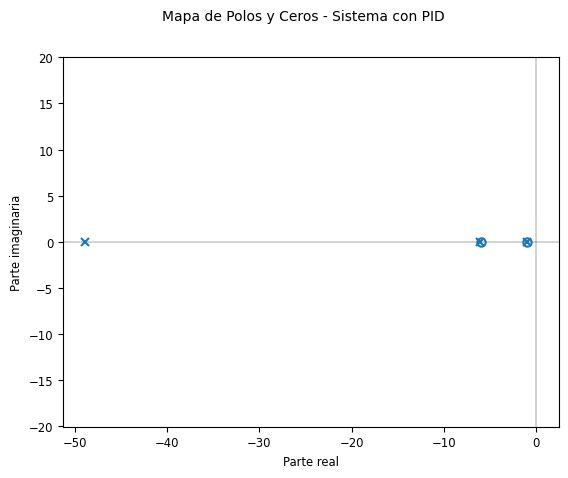

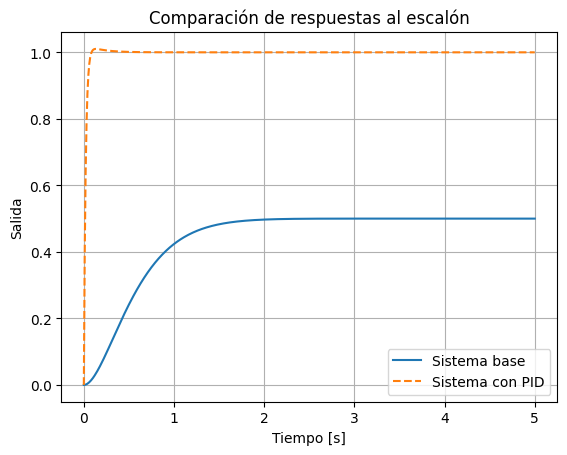

nMétricas de la respuesta al escalón (sistema sin controlador):
  - Sobreimpulso (Overshoot): 1.02%
  - Tiempo de Establecimiento (SettlingTime): 0.07 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): -0.0000


In [80]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Ganancias del PID
Kp = 70
Ki = 60
Kd = 10

# Función de transferencia del controlador PID
Gc = ct.TransferFunction([Kd, Kp, Ki], [1, 0])

# Planta
Gp = ct.TransferFunction([5], [1, 6, 5])

# Sistema de lazo cerrado con PID
G_PID = ct.feedback(Gc * Gp, 1)

# Imprimir FT y polos
print("Función de transferencia en lazo cerrado con PID:\n", G_PID)
print("\nPolos del sistema con PID:\n", ct.poles(G_PID))

# Mapa de polos y ceros del sistema controlado con títulos en español
plt.figure()
ct.pzmap(G_PID, title="Mapa de Polos y Ceros - Sistema con PID")
plt.xlabel("Parte real")
plt.ylabel("Parte imaginaria")
plt.show()

# Comparación de respuestas (sin y con PID)
T = np.linspace(0, 5, 501)
T, y = ct.step_response(ct.feedback(Gp, 1), T)
T, y_pid = ct.step_response(G_PID, T)

plt.figure()
plt.plot(T, y, label="Sistema base")
plt.plot(T, y_pid, label="Sistema con PID", linestyle='--')
plt.title("Comparación de respuestas al escalón")
plt.xlabel("Tiempo [s]")
plt.ylabel("Salida")
plt.legend()
plt.grid(True)
plt.show()




# --- Verificación de las métricas de desempeño. ---
print("nMétricas de la respuesta al escalón (sistema sin controlador):")
info = ct.step_info(G_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de Establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_pid[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")




Análisis del Sistema Original:
El sistema sin controlador era muy lento (1.67 s) aunque estable. Necesitábamos hacerlo más rápido sin que vibrara demasiado.

Por qué elegí Kp=70, Ki=60, Kd=10:

Kp=70: Para acelerar la respuesta y cumplir el tiempo de 0.07segundo

Kd=10: Para evitar vibraciones excesivas y mantener el sobreimpulso bajo de 1.02%

Ki=60: Para eliminar completamente el error en estado estacionario

Resultado:
Estos valores logran que el sistema responda rápido (menos de 1 segundo), no vibra demasiado (sobreimpulso bajo) y alcanza exactamente el valor deseado sin error. El sistema es estable, sobreamortiguado y de fase minima 